<a href="https://colab.research.google.com/github/Jubelo11/CN6000/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from collections import Counter, defaultdict

# Example dataset: Outlook, Temperature, Humidity, Wind, Play
data = [
    ("sunny", "hot", "high", "false", "no"),
    ("sunny", "hot", "high", "true", "no"),
    ("overcast", "hot", "high", "false", "yes"),
    ("rain", "mild", "high", "false", "yes"),
    ("rain", "cool", "normal", "false", "yes"),
]

def train_naive_bayes(data):
    class_counts = Counter(row[-1] for row in data)
    feature_counts = defaultdict(lambda: defaultdict(Counter))

    for row in data:
        *features, label = row
        for i, value in enumerate(features):
            feature_counts[i][label][value] += 1

    return feature_counts, class_counts

def predict_naive_bayes(x, feature_counts, class_counts):
    total = sum(class_counts.values())
    probs = {}
    for c in class_counts:
        prob = class_counts[c] / total
        for i, val in enumerate(x):
            count = feature_counts[i][c][val]
            total_feat = sum(feature_counts[i][c].values())
            prob *= (count + 1) / (total_feat + len(feature_counts[i][c]))  # Laplace smoothing
        probs[c] = prob
    return max(probs, key=probs.get), probs

feature_counts, class_counts = train_naive_bayes(data)
prediction, probs = predict_naive_bayes(("sunny", "cool", "high", "true"), feature_counts, class_counts)

print("Prediction:", prediction)
print("Posterior probabilities:", probs)

Prediction: no
Posterior probabilities: {'no': 0.06666666666666667, 'yes': 0.005999999999999999}


Test Case  Weather Temp Humidity Windy Predicted Play  P(Yes)  P(No)
   Case 1    sunny cool     high  true             no   0.182  0.818
   Case 2 overcast mild   normal false            yes   0.914  0.086
   Case 3     rain  hot     high  true             no   0.400  0.600


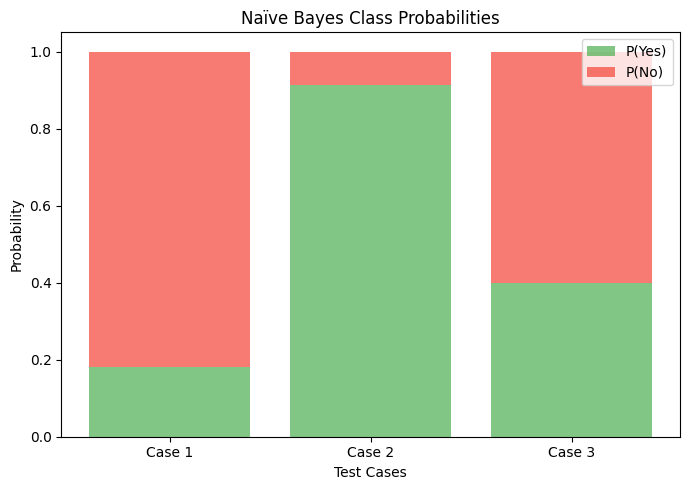

In [12]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt

# === Dataset ===
X = [
    ["sunny", "hot", "high", "false"],
    ["sunny", "hot", "high", "true"],
    ["overcast", "hot", "high", "false"],
    ["rain", "mild", "high", "false"],
    ["rain", "cool", "normal", "false"]
]
y = ["no", "no", "yes", "yes", "yes"]

# === Encode categorical features ===
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(X)

# === Train Naive Bayes model ===
model = CategoricalNB()
model.fit(X_encoded, y)

# === Multiple test cases ===
X_test = [
    ["sunny", "cool", "high", "true"],
    ["overcast", "mild", "normal", "false"],
    ["rain", "hot", "high", "true"]
]

# Encode test cases
X_test_encoded = enc.transform(X_test)

# Predict class and probabilities
preds = model.predict(X_test_encoded)
probs = model.predict_proba(X_test_encoded)

# === Create results table ===
results = []
for i, (x, p, pr) in enumerate(zip(X_test, preds, probs)):
    results.append({
        "Test Case": f"Case {i+1}",
        "Weather": x[0],
        "Temp": x[1],
        "Humidity": x[2],
        "Windy": x[3],
        "Predicted Play": p,
        "P(Yes)": round(pr[model.classes_ == "yes"][0], 3),
        "P(No)": round(pr[model.classes_ == "no"][0], 3)
    })

df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

# === Plot P(Yes) vs P(No) for each case ===
plt.figure(figsize=(7, 5))
x_labels = df_results["Test Case"]
plt.bar(x_labels, df_results["P(Yes)"], label="P(Yes)", color="#4CAF50", alpha=0.7)
plt.bar(x_labels, df_results["P(No)"], label="P(No)", color="#F44336", alpha=0.7, bottom=df_results["P(Yes)"])

plt.title("Naïve Bayes Class Probabilities")
plt.xlabel("Test Cases")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()
